<a href="https://colab.research.google.com/github/raghavanpartha/FirstApp/blob/main/CNN_Lung_infection_prediction_raj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# CNN Lung infection prediction by Srinivasa Raghavan, Coding done on Colab

In [3]:
# Create a Classification model that can predict whether the given image belongs to Healthy lung or type1 or type2 disease

In [4]:
# Extracting the data
! unzip data_Lungs.zip

Archive:  data_Lungs.zip
replace __MACOSX/._data_Lungs? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._data_Lungs   
  inflating: data_Lungs/.DS_Store    
  inflating: __MACOSX/data_Lungs/._test  
  inflating: __MACOSX/data_Lungs/._train  
  inflating: __MACOSX/data_Lungs/test/._Type 1 disease  
  inflating: data_Lungs/test/.DS_Store  
  inflating: __MACOSX/data_Lungs/test/._healthy  
  inflating: __MACOSX/data_Lungs/test/._Type 2 disease  
  inflating: __MACOSX/data_Lungs/train/._Type 1 disease  
  inflating: data_Lungs/train/.DS_Store  
  inflating: __MACOSX/data_Lungs/train/._healthy  
  inflating: __MACOSX/data_Lungs/train/._Type 2 disease  
  inflating: data_Lungs/test/Type 1 disease/radiopaedia-2019-novel-coronavirus-infected-pneumonia.jpg  
  inflating: data_Lungs/test/Type 1 disease/COVID-00012.jpg  
  inflating: data_Lungs/test/Type 1 disease/0105.png  
  inflating: data_Lungs/test/Type 1 disease/0111.jpg  
  inflating: data_Lungs/test/Type 1 disease/0112.jpg 

In [5]:
import tensorflow as tf

In [6]:
#Preprocessing --- Goal to make the data compatible for CNN input
# In tensorflow, you can achieve the same using ImageGenerators


train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255.)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255.)

In [7]:
#Pass the images through the generator

trainImageData = train_generator.flow_from_directory("data_Lungs/train/",
                                                     batch_size=16, #how much images to give per iteration in an epoch
                                                     class_mode="categorical", #Incase of multi-class classification, "categorical"
                                                     target_size=(48,48) #Ensures all images are of same size (resizing)
                                                     ) 


testImageData = train_generator.flow_from_directory("data_Lungs/test/",
                                                     batch_size=16, #how much images to give per iteration in an epoch
                                                     class_mode="categorical", #Incase of multi-class classification, "categorical"
                                                     target_size=(48,48) #Ensures all images are of same size (resizing)
                                                     ) 

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [8]:
#Given dataset is a balanced dataset !!!

trainImageData.class_indices

{'Type 1 disease': 0, 'Type 2 disease': 1, 'healthy': 2}

In [9]:
#Given dataset is a balanced dataset !!!

testImageData.class_indices

{'Type 1 disease': 0, 'Type 2 disease': 1, 'healthy': 2}

In [10]:
trainImageData.filenames

['Type 1 disease/01.jpeg',
 'Type 1 disease/010.png',
 'Type 1 disease/012.jpeg',
 'Type 1 disease/015.jpg',
 'Type 1 disease/019.png',
 'Type 1 disease/02.jpeg',
 'Type 1 disease/020.jpg',
 'Type 1 disease/021.jpeg',
 'Type 1 disease/022.jpeg',
 'Type 1 disease/024.jpeg',
 'Type 1 disease/025.jpeg',
 'Type 1 disease/026.jpeg',
 'Type 1 disease/027.jpeg',
 'Type 1 disease/03.jpeg',
 'Type 1 disease/031.jpeg',
 'Type 1 disease/032.jpeg',
 'Type 1 disease/033.png',
 'Type 1 disease/039.jpeg',
 'Type 1 disease/04.png',
 'Type 1 disease/040.jpeg',
 'Type 1 disease/041.jpeg',
 'Type 1 disease/042.jpeg',
 'Type 1 disease/043.jpeg',
 'Type 1 disease/044.jpeg',
 'Type 1 disease/045.jpeg',
 'Type 1 disease/046.jpeg',
 'Type 1 disease/047.jpeg',
 'Type 1 disease/048.jpeg',
 'Type 1 disease/049.jpeg',
 'Type 1 disease/050.jpeg',
 'Type 1 disease/051.jpeg',
 'Type 1 disease/052.jpeg',
 'Type 1 disease/053.jpeg',
 'Type 1 disease/054.jpeg',
 'Type 1 disease/055.jpeg',
 'Type 1 disease/056.jpg',
 'T

In [11]:
testImageData.filenames

['Type 1 disease/0100.jpeg',
 'Type 1 disease/0102.jpeg',
 'Type 1 disease/0105.png',
 'Type 1 disease/0106.jpeg',
 'Type 1 disease/0108.jpeg',
 'Type 1 disease/0111.jpg',
 'Type 1 disease/0112.jpg',
 'Type 1 disease/0113.jpg',
 'Type 1 disease/0115.jpeg',
 'Type 1 disease/0118.jpeg',
 'Type 1 disease/0119.jpeg',
 'Type 1 disease/0120.jpg',
 'Type 1 disease/094.png',
 'Type 1 disease/096.png',
 'Type 1 disease/098.jpeg',
 'Type 1 disease/COVID-00003b.jpg',
 'Type 1 disease/COVID-00012.jpg',
 'Type 1 disease/COVID-00022.jpg',
 'Type 1 disease/COVID-00033.jpg',
 'Type 1 disease/COVID-00037.jpg',
 'Type 1 disease/auntminnie-2020_01_31_20_24_2322_2020_01_31_x-ray_coronavirus_US.jpg',
 'Type 1 disease/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'Type 1 disease/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'Type 1 disease/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'Type 1 disease/auntminnie-d-2020_01_28_

In [12]:
trainImageData.image_shape

(48, 48, 3)

In [13]:
testImageData.image_shape

(48, 48, 3)

In [14]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


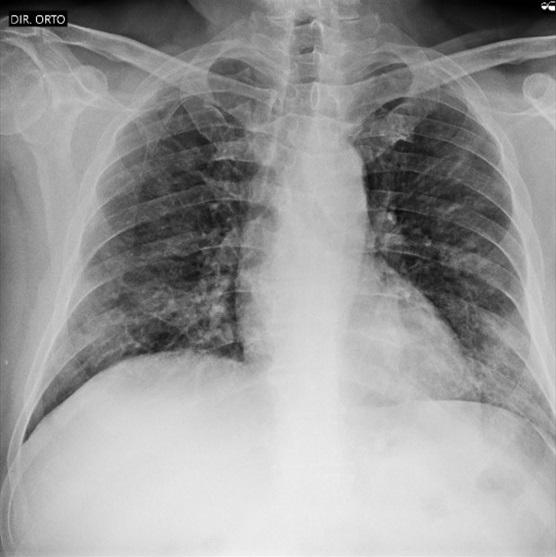

In [15]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow
img = cv2.imread('COVID-00012.jpg')
cv2_imshow(img)

#import matplotlib.image as mpimg 
#from matplotlib.pyplot import imshow
#%matplotlib inline
#testim = mpimg.imread('COVID-00012.jpg')
#imshow(testim)

#while True:
#    k = cv2_imshow.waitKey(0) & 0xFF     
#    if k == 27: break             # ESC key to exit
#cv2_imshow.destroyAllWindows()

In [16]:
# ARchitect the model

model = tf.keras.models.Sequential()

#Convolution Layer
#================================================================================================================================================
#First Convolution Layer

#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding) Here same means add one pad layer

model.add(tf.keras.layers.Conv2D(32 , (3,3) , input_shape= trainImageData.image_shape , activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling 

#Second Convolution Layer

#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding) Here same means add one pad layer

model.add(tf.keras.layers.Conv2D(16 , (3,3), activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling 

#=================================================================================================================================================
# Flatten

model.add(tf.keras.layers.Flatten())

#=================================================================================================================================================
# ANN
model.add(tf.keras.layers.Dense(units= 4096 , activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 256, activation="relu"))
model.add(tf.keras.layers.Dense(units= 3 , activation="softmax"))
#model.add(tf.keras.layers.Dense(units= 2 , activation="softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 4096)              9

In [18]:
#Compile

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", #For multi-class classification: categorical_crossentropy | sparse_categorical_crossentropy
              metrics=['accuracy'])

In [19]:
len(trainImageData.filenames) // trainImageData.batch_size

15

In [20]:
#Callbacks

# How to stop the training process if my model has converged successfully?
# Convergence Criteria:
# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Test Score >= CL
# Custom Callback which satisfies the above two criteria :)

class MyQualityThreshold(tf.keras.callbacks.Callback):
  def __init__(self,cl):
    super(MyQualityThreshold, self).__init__()
    self.cl = cl
  
  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']
    #epoch=logs['']

    if testScore > trainScore and testScore >= self.cl and epoch > 10:
      self.model.stop_training=True

In [21]:
# Fit the model
# batch_size=32
# model.fit(trainImageData,
#          validation_data=testImageData,
#          epochs=10,
#          steps_per_epoch = len(trainImageData.filenames) // trainImageData.batch_size, #For training
#          validation_steps= len(testImageData.filenames) // testImageData.batch_size) #For testing

In [22]:
# Fit the model
# batch_size=32
history = model.fit(trainImageData,
                    validation_data=testImageData,
                    epochs=50,
                    steps_per_epoch=len(trainImageData.filenames) // trainImageData.batch_size, #For training
                    validation_steps=len(testImageData.filenames) // testImageData.batch_size, #For testing
                    callbacks=[MyQualityThreshold(0.8)])

Epoch 1/50
15/15 [==============================] - 23s 1s/step - loss: 2.0056 - accuracy: 0.4681 - val_loss: 0.6542 - val_accuracy: 0.6719
Epoch 2/50
15/15 [==============================] - 15s 989ms/step - loss: 0.7349 - accuracy: 0.6851 - val_loss: 0.6752 - val_accuracy: 0.6406
Epoch 3/50
15/15 [==============================] - 16s 1s/step - loss: 0.4878 - accuracy: 0.8128 - val_loss: 0.5301 - val_accuracy: 0.7500
Epoch 4/50
15/15 [==============================] - 15s 1s/step - loss: 0.3641 - accuracy: 0.8511 - val_loss: 0.5197 - val_accuracy: 0.8594
Epoch 5/50
15/15 [==============================] - 16s 1s/step - loss: 0.3536 - accuracy: 0.8792 - val_loss: 0.9729 - val_accuracy: 0.6250
Epoch 6/50
15/15 [==============================] - 14s 977ms/step - loss: 0.2126 - accuracy: 0.9106 - val_loss: 0.8750 - val_accuracy: 0.7500
Epoch 7/50
15/15 [==============================] - 15s 989ms/step - loss: 0.4238 - accuracy: 0.9106 - val_loss: 1.1555 - val_accuracy: 0.7500
Epoch 8/50


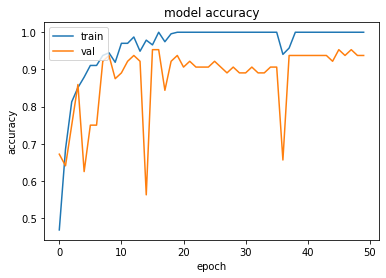

In [23]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

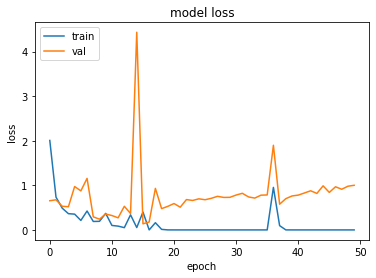

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
#Prediction
# model
#Load an Image
imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(48, 48))
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
#Step4: Prediction
prediction = model.predict(myCompatibleImage)
print(prediction)

[[1. 0. 0.]]


In [27]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.,
                                                                  rotation_range=90,
                                                                  zoom_range=0.2,
                                                                  horizontal_flip=True,
                                                                  vertical_flip=True)


In [28]:
#Callbacks

# How to stop the training process if my model has converged successfully?
# Convergence Criteria:
# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Test Score >= CL
# Custom Callback which satisfies the above two criteria :)

class MyQualityThreshold(tf.keras.callbacks.Callback):
  def __init__(self,cl):
    super(MyQualityThreshold, self).__init__()
    self.cl = cl
  
  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']
    #epoch=logs['']

    if testScore > trainScore and testScore >= self.cl and epoch > 10:
      self.model.stop_training=True

In [29]:
# Fit the model after augmentation

history = model.fit(trainImageData,
                    validation_data=testImageData,
                    epochs=50,
                    steps_per_epoch=len(trainImageData.filenames) // trainImageData.batch_size, #For training
                    validation_steps=len(testImageData.filenames) // testImageData.batch_size, #For testing
                    callbacks=[MyQualityThreshold(0.8)])

Epoch 1/50
15/15 [==============================] - 16s 1s/step - loss: 4.8698e-08 - accuracy: 1.0000 - val_loss: 1.0286 - val_accuracy: 0.9375
Epoch 2/50
15/15 [==============================] - 15s 1s/step - loss: 2.5468 - accuracy: 0.9191 - val_loss: 0.5075 - val_accuracy: 0.8906
Epoch 3/50
15/15 [==============================] - 16s 1s/step - loss: 0.0151 - accuracy: 0.9917 - val_loss: 0.5638 - val_accuracy: 0.8906
Epoch 4/50
15/15 [==============================] - 15s 999ms/step - loss: 2.8578e-04 - accuracy: 1.0000 - val_loss: 0.5884 - val_accuracy: 0.9062
Epoch 5/50
15/15 [==============================] - 15s 953ms/step - loss: 4.2400e-05 - accuracy: 1.0000 - val_loss: 0.6116 - val_accuracy: 0.9062
Epoch 6/50
15/15 [==============================] - 15s 1s/step - loss: 3.1669e-05 - accuracy: 1.0000 - val_loss: 0.6151 - val_accuracy: 0.9219
Epoch 7/50
15/15 [==============================] - 15s 1s/step - loss: 5.3311e-06 - accuracy: 1.0000 - val_loss: 0.6220 - val_accuracy: 0

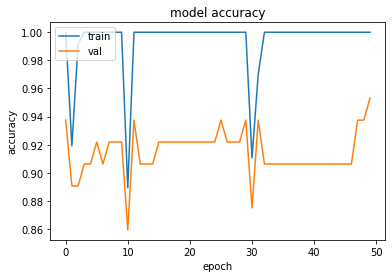

In [30]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

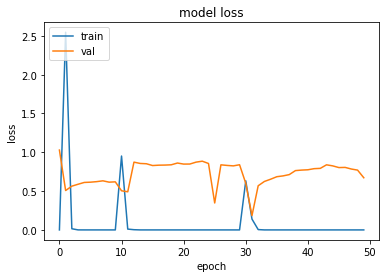

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
#Prediction
# model
#Load an Image
imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(48, 48))
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
#Step4: Prediction
prediction = model.predict(myCompatibleImage)
print(prediction)

[[1. 0. 0.]]


In [33]:
#Saving Model
model.save("LungsDiseaseDetector")

INFO:tensorflow:Assets written to: LungsDiseaseDetector/assets


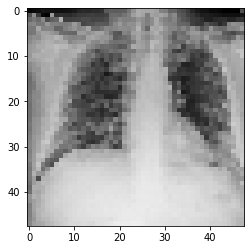

In [34]:
#Deployment Example
#Step1: Load an Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(48, 48))
plt.imshow(imageToPredict)

In [35]:
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)

myImageNPArray.shape

(48, 48, 3)

In [36]:
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
myCompatibleImage.shape

(1, 48, 48, 3)

In [37]:
#Step4: Prediction
prediction = model.predict(myCompatibleImage)

In [38]:
prediction

array([[1., 0., 0.]], dtype=float32)

In [39]:
list(trainImageData.class_indices)[np.argmax(prediction)]

'Type 1 disease'

In [40]:
# Part#2 - Transfer learning using mobile net:

In [41]:
import tensorflow as tf
from glob import glob

In [42]:
# Set the training path and validation path

train_path = 'data_Lungs/train/'
validation_path = 'data_Lungs/test/'

In [43]:
#Initialize Glob to interact with storage

image_files = glob(train_path +'/*/*.jp*g')
valid_image_files = glob(validation_path +'/*/*.jp*g')

In [44]:
#Step1: Create ImageGenerator object (Use Algo's preprocessing function)

gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
                                                      rotation_range=20,
                                                      shear_range=0.1,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      vertical_flip=True)

gen2 = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)

In [45]:
#Step2: Create Train and Valid Obj

train_generator = gen.flow_from_directory(train_path,
                                          target_size=[48,48],
                                          class_mode='categorical',
                                          batch_size=16)

valid_generator = gen2.flow_from_directory(validation_path,
                                          target_size=[48,48],
                                          class_mode='categorical',
                                          batch_size=16)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [46]:
#Step3: Load the model with Training Enabled ! ---> 
# include_top = False will remove FC layer from existing arch


mobnet = tf.keras.applications.mobilenet.MobileNet(input_shape=[48,48,3],
                                        weights="imagenet",
                                        include_top=False)

#Following Method 1, that will lock weights of CNN layer

for layer in mobnet.layers:
  layer.trainable=False #If Approach 1--- True else False

17235968/17225924 [==============================] - 0s 0us/step


In [47]:
#Step4: Create FC layer

#Flatten

flatten = tf.keras.layers.Flatten()

# You can create your hidden layers here
#hLayer1 = tf.keras.layers.Dense(4000,activation="relu")
#hLayer2 = tf.keras.layers.Dense(4000,activation="relu")
#hLayer3 = tf.keras.layers.Dense(4000,activation="relu")

# Output Layer


finalLayer = tf.keras.layers.Dense(3,activation="softmax")

In [48]:
#Create Final Model

model = tf.keras.models.Sequential([
                                    mobnet,
                                    flatten,
                                    finalLayer
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1, 1, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 3,231,939
Trainable params: 3,075
Non-trainable params: 3,228,864
_________________________________________________________________


In [49]:
mobnet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 24, 24, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 24, 24, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 24, 24, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 24, 24, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 24, 24, 32)       128       
 ation)                                         

In [50]:
#Compile

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [51]:
# Callbacks Convergence Criteria:
# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Test Score >= CL
# Custom Callback which satisfies the above two criteria :)

class MyQualityThreshold(tf.keras.callbacks.Callback):
  def __init__(self,cl):
    super(MyQualityThreshold, self).__init__()
    self.cl = cl
  
  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']
    #epoch=logs['']

    if testScore > trainScore and testScore >= self.cl and epoch > 2:
      self.model.stop_training=True

In [52]:
#Fit Model 
batch_size=16
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=10,
                    steps_per_epoch=len(train_generator.filenames) // batch_size,
                    validation_steps=len(valid_generator.filenames) // batch_size,
                    callbacks=[MyQualityThreshold(0.8)])

Epoch 1/10
15/15 [==============================] - 15s 915ms/step - loss: 1.0778 - accuracy: 0.4170 - val_loss: 1.1023 - val_accuracy: 0.3594
Epoch 2/10
15/15 [==============================] - 14s 932ms/step - loss: 1.0753 - accuracy: 0.4213 - val_loss: 1.0929 - val_accuracy: 0.3750
Epoch 3/10
15/15 [==============================] - 13s 810ms/step - loss: 1.0699 - accuracy: 0.4426 - val_loss: 1.0879 - val_accuracy: 0.3906
Epoch 4/10
15/15 [==============================] - 13s 820ms/step - loss: 1.0650 - accuracy: 0.4723 - val_loss: 1.0871 - val_accuracy: 0.3750
Epoch 5/10
15/15 [==============================] - 13s 861ms/step - loss: 1.0598 - accuracy: 0.4553 - val_loss: 1.0849 - val_accuracy: 0.3906
Epoch 6/10
15/15 [==============================] - 13s 874ms/step - loss: 1.0626 - accuracy: 0.4511 - val_loss: 1.0837 - val_accuracy: 0.3906
Epoch 7/10
15/15 [==============================] - 13s 860ms/step - loss: 1.0409 - accuracy: 0.4766 - val_loss: 1.0780 - val_accuracy: 0.4062

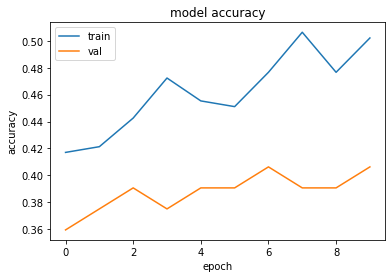

In [53]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

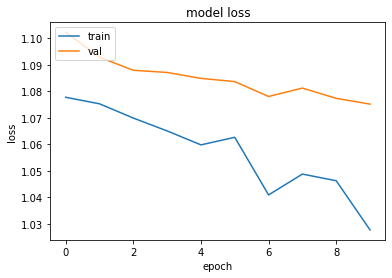

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [55]:
#Saving Model
model.save("LungsDetectorMobileNet")

INFO:tensorflow:Assets written to: LungsDetectorMobileNet/assets


INFO:tensorflow:Assets written to: LungsDetectorMobileNet/assets


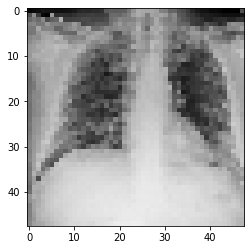

In [56]:
#Step1 - Load an Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(48, 48))
plt.imshow(imageToPredict)

In [57]:
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)
myImageNPArray.shape

(48, 48, 3)

In [58]:
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
myCompatibleImage.shape

(1, 48, 48, 3)

In [59]:
#Step4: Prediction
prediction = model.predict(myCompatibleImage)
prediction

array([[0.44470984, 0.27295536, 0.28233477]], dtype=float32)

In [60]:
list(train_generator.class_indices)[np.argmax(prediction)]

'Type 1 disease'

In [61]:
# Part#3 - Transfer learning using Densenet:

In [62]:
#Step1: Create ImageGenerator object (Use Algo's preprocessing function)

gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input,
                                                      rotation_range=20,
                                                      shear_range=0.1,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      vertical_flip=True)

gen2 = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)

In [63]:
#Step2: Create Train and Valid Obj

train_generator = gen.flow_from_directory(train_path,
                                          target_size=[224,224],
                                          class_mode='categorical',
                                          batch_size=7)

valid_generator = gen2.flow_from_directory(validation_path,
                                          target_size=[224,224],
                                          class_mode='categorical',
                                          batch_size=7)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [64]:
#Step3: Load the model with Training Enabled ! ---> 
# include_top = False will remove FC layer from existing arch


densnet = tf.keras.applications.densenet.DenseNet121(input_shape=[224,224,3],
                                        weights="imagenet",
                                        include_top=False)

#Following Method 1, that will lock weights of CNN layer

for layer in densnet.layers:
  layer.trainable=False #If Approach 1--- True else False

29097984/29084464 [==============================] - 0s 0us/step


In [65]:
#Step4: Create FC layer

#Flatten

flatten = tf.keras.layers.Flatten()

# You can create your hidden layers here
#hLayer1 = tf.keras.layers.Dense(4000,activation="relu")
#hLayer2 = tf.keras.layers.Dense(4000,activation="relu")
#hLayer3 = tf.keras.layers.Dense(4000,activation="relu")

# Output Layer


finalLayer = tf.keras.layers.Dense(3,activation="softmax")

In [66]:
#Create Final Model

model = tf.keras.models.Sequential([
                                    densnet,
                                    flatten,
                                    finalLayer
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
 dense_5 (Dense)             (None, 3)                 150531    
                                                                 
Total params: 7,188,035
Trainable params: 150,531
Non-trainable params: 7,037,504
_________________________________________________________________


In [67]:
densnet.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [68]:
#Compile

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [69]:
# Callbacks Convergence Criteria:
# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Test Score >= CL
# Custom Callback which satisfies the above two criteria :)

class MyQualityThreshold(tf.keras.callbacks.Callback):
  def __init__(self,cl):
    super(MyQualityThreshold, self).__init__()
    self.cl = cl
  
  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']
    #epoch=logs['']

    if testScore > trainScore and testScore >= self.cl and epoch > 15:
      self.model.stop_training=True

In [70]:
#Fit Model 
batch_size=7
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=15,
                    steps_per_epoch=len(train_generator.filenames) // batch_size,
                    validation_steps=len(valid_generator.filenames) // batch_size,
                    callbacks=[MyQualityThreshold(0.8)])

Epoch 1/15
35/35 [==============================] - 68s 2s/step - loss: 4.6560 - accuracy: 0.6475 - val_loss: 1.5438 - val_accuracy: 0.7460
Epoch 2/15
35/35 [==============================] - 59s 2s/step - loss: 0.9529 - accuracy: 0.9016 - val_loss: 0.7257 - val_accuracy: 0.9048
Epoch 3/15
35/35 [==============================] - 59s 2s/step - loss: 1.8409 - accuracy: 0.8443 - val_loss: 0.6578 - val_accuracy: 0.9048
Epoch 4/15
35/35 [==============================] - 59s 2s/step - loss: 1.2979 - accuracy: 0.8934 - val_loss: 0.9706 - val_accuracy: 0.8889
Epoch 5/15
35/35 [==============================] - 58s 2s/step - loss: 2.5760 - accuracy: 0.8402 - val_loss: 0.8448 - val_accuracy: 0.9365
Epoch 6/15
35/35 [==============================] - 58s 2s/step - loss: 0.7196 - accuracy: 0.9303 - val_loss: 0.6420 - val_accuracy: 0.9206
Epoch 7/15
35/35 [==============================] - 59s 2s/step - loss: 0.6764 - accuracy: 0.9344 - val_loss: 0.0194 - val_accuracy: 0.9841
Epoch 8/15
35/35 [==

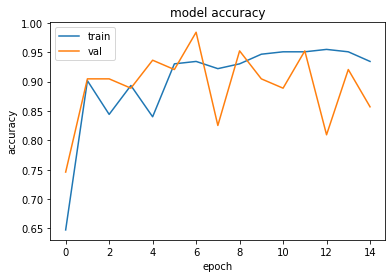

In [71]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

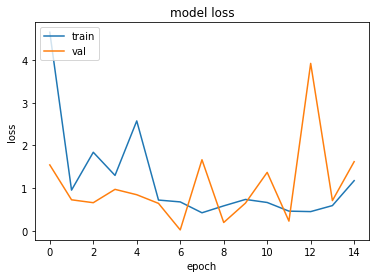

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [73]:
#Saving Model
model.save("LungsDetectorDenseNet")

INFO:tensorflow:Assets written to: LungsDetectorDenseNet/assets


INFO:tensorflow:Assets written to: LungsDetectorDenseNet/assets


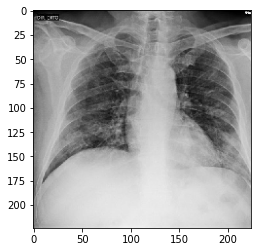

In [74]:
#Step1 - Load an Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(224, 224))
plt.imshow(imageToPredict)

In [75]:
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)
myImageNPArray.shape

(224, 224, 3)

In [76]:
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
myCompatibleImage.shape

(1, 224, 224, 3)

In [77]:
#Step4: Prediction
prediction = model.predict(myCompatibleImage)
prediction

array([[1., 0., 0.]], dtype=float32)

In [78]:
list(train_generator.class_indices)[np.argmax(prediction)]

'Type 1 disease'